In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1001)

In [2]:
# 生成随机的聚类数据，聚类中心为3个
n = 1000
centers = [[1, 1], [-1, -1], [1, -1]]
data, _ = make_blobs(n_samples=n, centers=centers, cluster_std=0.5)

In [3]:
def train_model(data, cluster_num):
    '''
    使用KMeans对数据进行聚类
    '''
    model = KMeans(n_clusters=cluster_num, n_init=1)
    model.fit(data)
    return model

def compute_SSE(model, data):
    '''
    计算聚类结果的误差平方和
    '''
    wdist = model.transform(data).min(axis=1)
    sse = np.sum(wdist ** 2)
    return sse

In [4]:
def _visualize(ax, data, labels, centers):
    '''
    将聚类结果可视化
    '''
    colors = ['#BAE7FC', '#3CAFFA', '#82CCFC', '#0C5FFA', 'k']
    ax.scatter(data[:, 0], data[:, 1], c=[colors[i] for i in labels], marker='o', alpha=0.8)
    ax.scatter(centers[:, 0], centers[:, 1], marker='*', c=colors[:len(centers)],
               edgecolors='white', s=600., linewidths=2)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

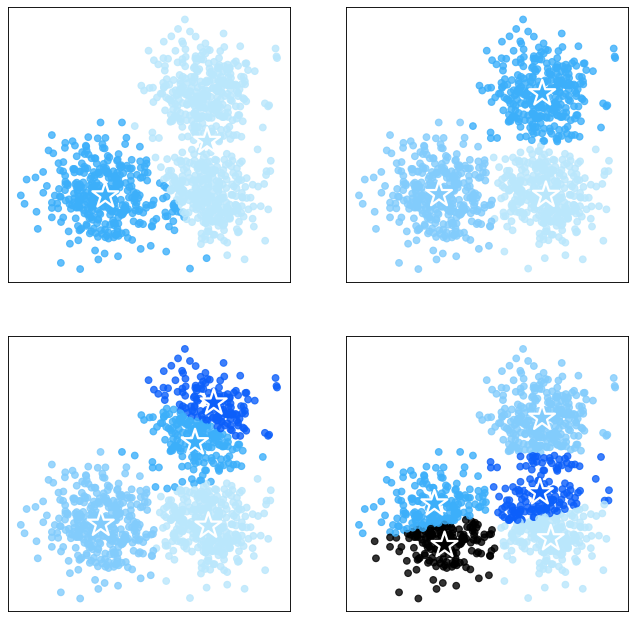

In [5]:
# 创建一个图形框
fig = plt.figure(figsize=(10, 10), dpi=80)
sse = []
for i in range(2, 6):
    ax = fig.add_subplot(2, 2, i-1)
    model = train_model(data, i)
    sse.append(compute_SSE(model, data))
    _visualize(ax, data, model.labels_, model.cluster_centers_)
plt.savefig('kmeans_choose_k.png', dpi=200)
plt.show()

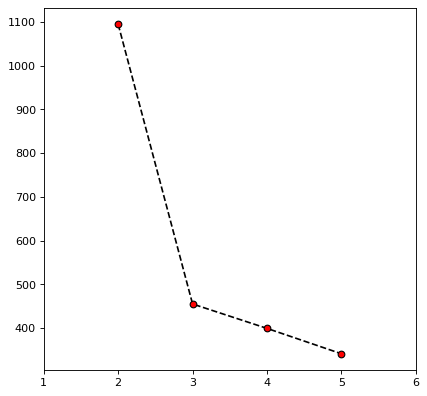

In [6]:
# 展示不同聚类个数的误差平方和
cluster_num = range(2, 6)
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(cluster_num, sse, 'k--', marker='o', markerfacecolor='r', markeredgecolor='k')
ax.set_xlim([min(cluster_num) - 1, max(cluster_num) + 1])
plt.savefig('kmeans_sse.png', dpi=200)